# Socrata Query Language (SoQL) Clauses and Functions
Mark Bauer

Table of Contents
=================

   * [1. Introduction](#1-Introduction)
       
       
   * [2. Socrata Open Data](#2-Socrata-Open-Data)
       * [2.1 Using Socrata Open Data API (SODA)](#22-Using-Socrata-Open-Data-API-(SODA))
       * [2.2 Using Sodapy](#21-Using-Sodapy)
       * [2.3 Socrata Query Language or "SoQl"](#22-Socrata-Query-Language-or-SoQl)
       
       
   * [3. Importing Libraries](#3-Data-Inspection)
   
   
   * [4. SoQL with Sodapy](#4-SoQL-with-Sodapy)
       * [4.1 SoQL Clauses](#41-SoQL-Clauses)
       * [4.2 SoQL Function and Keyword Listing](42-SoQL-Function-and-Keyword-Listing)
   

   * [5. Answering Questions about NYC 311 Complaints with SoQL](#5-Answering-Questions-about-NYC-311-Complaints-with-SoQL)
   
   
   * [6. Retrieving Data Directly from Socrata Open Data API (SODA)](#6-Retrieving-Data-Directly-from-Socrata-Open-Data-API-SODA)
       
          
   * [7. Conclusion](#7-Conclusion)

# 1. Introduction  
This notebook demonstrates basic queries using SoQL, the Socrata Query Language. 

# 2. Socrata Open Data

## 2.1 Socrata Open Data API (SODA)

More information can be found on the offical [Socrata Open Data API (SODA)](https://dev.socrata.com/) website. We use sodapy, a python client, to interact with the Socrata Open Data API.

There's a lot of great resources on the website, and I encourage you to read through the [API Docs](https://dev.socrata.com/docs/endpoints.html) to further your understanding.

![dev socrata](images/dev-socrata.png)

source: https://dev.socrata.com/

## 2.2 Sodapy

Sodapy - a python client for the Socrata Open Data API.
Information about sodapy can be found in its offical docs on [GitHub](https://github.com/xmunoz/sodapy), as well as my notebook tutorial in this project here [sodapy_basics.ipynb](https://github.com/mebauer/sodapy-tutorial-nyc-open-data/blob/main/sodapy_basics.ipynb).


In order use sodapy, a **source domain** (i.e. the open data source you are trying to connect to) needs to be passed to the Socrata class. Additionally, if a user wants to query a specific data set, then the **data set identifier** (i.e. the data set id on the given source domain) needs to be passed as well. Below, we identify NYC Open Data's source domain: `data.cityofnewyork.us` and the data set identifier for the NYC 311 data set: `erm2-nwe9`. The screenshot is the homepage of the 311 data set from NYC Open Data.

![nyc-311-api-docs](images/nyc-311-api-docs.png)  

Source: https://dev.socrata.com/foundry/data.cityofnewyork.us/erm2-nwe9

## 2.3 Socrata Query Language or "SoQl"

![soql screenshot](images/soql-screenshot.png)

source: https://dev.socrata.com/docs/queries/

# 3. Importing Libraries

In [60]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [61]:
%reload_ext watermark

In [62]:
%watermark -a "Mark Bauer" -u -t -d -v -p pandas,sodapy

Mark Bauer 
last updated: 2021-02-08 09:18:58 

CPython 3.7.1
IPython 7.18.1

pandas 1.0.0
sodapy 2.0.0


Documention for installing watermark: https://github.com/rasbt/watermark

# 4. SoQL with Sodapy

## 4.1 SoQL Clauses

In [63]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select all columns,
# where the descriptor is Street Flooding (SJ),
# limit our records to 1,000.

query = """
SELECT 
    *
WHERE 
    descriptor == 'Street Flooding (SJ)'
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', results_df.descriptor.unique())
print('shape of data:', results_df.shape)

results_df.head()

311 descriptor: ['Street Flooding (SJ)']
shape of data: (1000, 31)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2
0,21431905,2011-09-13T17:50:00.000,2011-09-20T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10019,210 WEST 50 STREET,WEST 50 STREET,...,988573,216734,UNKNOWN,Unspecified,MANHATTAN,40.76156016137893,-73.98439489825104,"{'latitude': '40.76156016137893', 'longitude':...",NaN,NaN
1,21431198,2011-09-13T14:12:00.000,2011-09-14T10:55:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10036,200 WEST 42 STREET,WEST 42 STREET,...,987804,214752,UNKNOWN,Unspecified,MANHATTAN,40.756120421073426,-73.98717187083514,"{'latitude': '40.756120421073426', 'longitude'...",NaN,NaN
2,21431904,2011-09-13T17:34:00.000,2011-09-14T10:20:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10019,NaN,NaN,...,988757,216332,UNKNOWN,Unspecified,MANHATTAN,40.76045668270954,-73.98373096728758,"{'latitude': '40.76045668270954', 'longitude':...",WEST 49 STREET,7 AVENUE
3,21431156,2011-09-13T12:47:00.000,2011-09-14T08:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11697,5 STATE ROAD,STATE ROAD,...,1015533,145614,UNKNOWN,Unspecified,QUEENS,40.56629748227965,-73.8874051386105,"{'latitude': '40.56629748227965', 'longitude':...",NaN,NaN
4,21431213,2011-09-13T13:43:00.000,2011-09-14T09:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420,NaN,NaN,...,1037479,185728,UNKNOWN,Unspecified,QUEENS,40.676297180641505,-73.80810023963616,"{'latitude': '40.676297180641505', 'longitude'...",131 STREET,FOCH BOULEVARD


In [64]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select all columns,
# where the descriptor is Street Flooding (SJ),
# sort the created_date in descending order and limit our records to 100.

query = """
SELECT 
    *
WHERE 
    descriptor == 'Street Flooding (SJ)'
ORDER BY 
    created_date DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', results_df.descriptor.unique())
print('shape of data:', results_df.shape)

results_df.head()

311 descriptor: ['Street Flooding (SJ)']
shape of data: (1000, 30)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,park_facility_name,park_borough,latitude,longitude,location,closed_date,resolution_description,resolution_action_updated_date,intersection_street_1,intersection_street_2
0,49727599,2021-02-06T18:35:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11427,201-40 EPSOM COURSE,EPSOM COURSE,FRANCIS LEWIS BLVD,...,Unspecified,QUEENS,40.72534960330429,-73.76409493705205,"{'latitude': '40.72534960330429', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,49724927,2021-02-06T17:52:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11365,64-41 UTOPIA PARKWAY,UTOPIA PARKWAY,64 AVE,...,Unspecified,QUEENS,40.737237933065586,-73.79303615038774,"{'latitude': '40.737237933065586', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,49731030,2021-02-06T09:57:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10314,55 RACAL COURT,RACAL COURT,RICHMOND HILL RD,...,Unspecified,STATEN ISLAND,40.58609090494919,-74.16444022366284,"{'latitude': '40.58609090494919', 'longitude':...",NaN,NaN,NaN,NaN,NaN
3,49718999,2021-02-05T18:35:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420,117-68 127 STREET,127 STREET,ROCKAWAY BLVD,...,Unspecified,QUEENS,40.67481134426877,-73.81086602033535,"{'latitude': '40.67481134426877', 'longitude':...",2021-02-06T16:40:00.000,The Department of Environmental Protection has...,2021-02-06T16:40:00.000,NaN,NaN
4,49724379,2021-02-05T15:50:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11224,2834 WEST 23 STREET,WEST 23 STREET,NEPTUNE AVE,...,Unspecified,BROOKLYN,40.57758125889847,-73.9903704230558,"{'latitude': '40.57758125889847', 'longitude':...",2021-02-06T06:30:00.000,The Department of Environmental Protection has...,2021-02-06T06:30:00.000,NaN,NaN


In [65]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   unique_key                      1000 non-null   object
 1   created_date                    1000 non-null   object
 2   agency                          1000 non-null   object
 3   agency_name                     1000 non-null   object
 4   complaint_type                  1000 non-null   object
 5   descriptor                      1000 non-null   object
 6   incident_zip                    993 non-null    object
 7   incident_address                747 non-null    object
 8   street_name                     747 non-null    object
 9   cross_street_1                  747 non-null    object
 10  cross_street_2                  747 non-null    object
 11  address_type                    1000 non-null   object
 12  city                            993 non-null    o

In [66]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the borough and count grouped by borough,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order.

query = """
SELECT 
    borough, 
    count(*) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    borough
ORDER BY 
    count DESC
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (6, 2)


,borough,count
0,QUEENS,10952
1,BROOKLYN,7002
2,STATEN ISLAND,4953
3,MANHATTAN,2589
4,BRONX,2050
5,Unspecified,14


In [67]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the borough and count grouped by borough having more than 5,000 counts,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order.

query = """
SELECT 
    borough, 
    count(*) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    borough
HAVING 
    count > 5000
ORDER BY 
    count DESC
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (2, 2)


,borough,count
0,QUEENS,10952
1,BROOKLYN,7002


## 4.2 SoQL Function and Keyword Listing

In [68]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the distinct status column,
# where the descriptor is Street Flooding (SJ),
# limit our records to 1,000.

query = """
SELECT 
    distinct(status) as distinct_status 
WHERE 
    descriptor == 'Street Flooding (SJ)'
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (5, 1)


,distinct_status
0,Assigned
1,Started
2,Open
3,Pending
4,Closed


In [69]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select all columns,
# where the descriptor is Street Flooding (SJ) and created_date is between 2011 and 2012,
# limit our records to 1,000.

query = """
SELECT 
    * 
WHERE 
    created_date between '2011' and '2012' AND
    descriptor == 'Street Flooding (SJ)'
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', results_df.descriptor.unique())
print('shape of data:', results_df.shape)
print('min:', results_df.created_date.min())
print('max:', results_df.created_date.max())

results_df.head()

311 descriptor: ['Street Flooding (SJ)']
shape of data: (1000, 31)
min: 2011-03-19T09:18:00.000
max: 2011-08-19T13:41:00.000


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2
0,20068090,2011-03-19T10:52:00.000,2011-03-22T10:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10019,1674 BROADWAY,BROADWAY,...,988929,217208,UNKNOWN,Unspecified,MANHATTAN,40.7628609882071,-73.98310948480062,"{'latitude': '40.7628609882071', 'longitude': ...",NaN,NaN
1,20068091,2011-03-19T09:18:00.000,2011-03-23T12:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11418,112-19 ATLANTIC AVE,ATLANTIC AVE,...,1030380,191607,UNKNOWN,Unspecified,QUEENS,40.69247350418123,-73.83365304856,"{'latitude': '40.69247350418123', 'longitude':...",NaN,NaN
2,20079313,2011-03-21T11:38:00.000,2011-03-21T12:50:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379,7963 69 AVE,69 AVE,...,1019886,197923,UNKNOWN,Unspecified,QUEENS,40.709857903354816,-73.87146142347333,"{'latitude': '40.709857903354816', 'longitude'...",NaN,NaN
3,20079309,2011-03-21T18:36:00.000,2011-03-21T20:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312,24 LITTLEFIELD AVE,LITTLEFIELD AVE,...,942781,134211,UNKNOWN,Unspecified,STATEN ISLAND,40.53495667592927,-74.14918670594267,"{'latitude': '40.53495667592927', 'longitude':...",NaN,NaN
4,20079316,2011-03-21T09:37:00.000,2011-03-22T08:40:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11691,12-50 BRUNSWICK AVE,BRUNSWICK AVE,...,1053866,161375,UNKNOWN,Unspecified,QUEENS,40.60934000436298,-73.74927384921338,"{'latitude': '40.60934000436298', 'longitude':...",NaN,NaN


In [70]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the descriptor, unique_key, borough, and case(borough != 'BRONX'),
# where the descriptor is Street Flooding (SJ),
# limit our records to 1,000.

query = """
SELECT 
    descriptor,
    unique_key,
    borough,
    case(borough != 'BRONX', False, True, True) AS in_bronx
WHERE 
    descriptor == 'Street Flooding (SJ)'
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', results_df.descriptor.unique())
print('shape of data:', results_df.shape)

results_df.head()

311 descriptor: ['Street Flooding (SJ)']
shape of data: (1000, 4)


,descriptor,unique_key,borough,in_bronx
0,Street Flooding (SJ),20068090,MANHATTAN,False
1,Street Flooding (SJ),20068091,QUEENS,False
2,Street Flooding (SJ),20079313,QUEENS,False
3,Street Flooding (SJ),20079309,STATEN ISLAND,False
4,Street Flooding (SJ),20079316,QUEENS,False


In [71]:
results_df.sort_values(by='in_bronx', ascending=False).head()

,descriptor,unique_key,borough,in_bronx
525,Street Flooding (SJ),20629768,BRONX,True
614,Street Flooding (SJ),20700913,BRONX,True
108,Street Flooding (SJ),20232217,BRONX,True
107,Street Flooding (SJ),20232025,BRONX,True
106,Street Flooding (SJ),29791354,BRONX,True


In [72]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the status and count columns grouped by status,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    status, 
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    status
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (5, 2)


,status,count
0,Closed,27536
1,Open,14
2,Pending,5
3,Started,3
4,Assigned,2


In [73]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the day and the count day columns grouped by day,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_d(created_date) AS day,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    day
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (31, 2)


,day,count
0,30,1218
1,25,1110
2,9,1106
3,13,1086
4,8,1054
5,29,1043
6,16,1040
7,1,1015
8,5,1004
9,27,976


In [74]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the day of week and the count columns grouped by day of week,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_dow(created_date) AS day_of_week,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    day_of_week
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (7, 2)


,day_of_week,count
0,2,4874
1,1,4865
2,5,4671
3,3,4527
4,4,4236
5,0,2288
6,6,2099


In [75]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the hour and the count columns grouped by hour,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_hh(created_date) AS hour,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    hour
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (24, 2)


,hour,count
0,11,2467
1,9,2360
2,10,2331
3,12,2221
4,15,2127
5,14,2072
6,13,2064
7,16,1918
8,8,1748
9,17,1459


In [76]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the month and the count columns grouped by month,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_m(created_date) AS month,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    month
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (12, 2)


,month,count
0,5,3289
1,6,2626
2,8,2560
3,2,2441
4,12,2368
5,11,2190
6,3,2152
7,10,2128
8,7,2112
9,4,2086


In [77]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the minute and the count columns grouped by minute,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_mm(created_date) AS minute,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    minute
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (60, 2)


,minute,count
0,0,524
1,32,504
2,44,501
3,40,496
4,28,486
5,35,484
6,33,483
7,23,483
8,43,482
9,49,482


In [78]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the week of year and the count columns grouped by week of year,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_woy(created_date) AS week_of_year,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    week_of_year
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (53, 2)


,week_of_year,count
0,18,1050
1,6,752
2,50,717
3,19,714
4,23,711
5,48,710
6,21,696
7,24,682
8,33,668
9,32,665


In [79]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the year and the count columns grouped by year,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_extract_y(created_date) AS year,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    year
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (12, 2)


,year,count
0,2018,4140
1,2019,2972
2,2011,2644
3,2017,2532
4,2010,2531
5,2014,2498
6,2016,2262
7,2012,2203
8,2020,2139
9,2015,1839


In [80]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the year truncated and the count columns grouped by year,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_trunc_y(created_date) AS year,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    year
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (12, 2)


,year,count
0,2018-01-01T00:00:00.000,4140
1,2019-01-01T00:00:00.000,2972
2,2011-01-01T00:00:00.000,2644
3,2017-01-01T00:00:00.000,2532
4,2010-01-01T00:00:00.000,2531
5,2014-01-01T00:00:00.000,2498
6,2016-01-01T00:00:00.000,2262
7,2012-01-01T00:00:00.000,2203
8,2020-01-01T00:00:00.000,2139
9,2015-01-01T00:00:00.000,1839


In [81]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the year month truncated and the count columns grouped by year month,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_trunc_ym(created_date) AS year_month,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    year_month
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (134, 2)


,year_month,count
0,2018-11-01T00:00:00.000,710
1,2017-05-01T00:00:00.000,524
2,2011-08-01T00:00:00.000,497
3,2016-02-01T00:00:00.000,490
4,2010-03-01T00:00:00.000,489
5,2019-05-01T00:00:00.000,452
6,2019-12-01T00:00:00.000,440
7,2019-06-01T00:00:00.000,435
8,2014-02-01T00:00:00.000,418
9,2018-03-01T00:00:00.000,405


In [82]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the year month day and the count columns grouped by year month day,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_trunc_ymd(created_date) AS year_month_day,
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    year_month_day
ORDER BY 
    count DESC    
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df.head(10)

311 descriptor: Street Flooding (SJ)
shape of data: (1000, 2)


,year_month_day,count
0,2017-05-05T00:00:00.000,247
1,2014-12-09T00:00:00.000,226
2,2014-04-30T00:00:00.000,189
3,2018-04-16T00:00:00.000,163
4,2013-05-08T00:00:00.000,162
5,2016-11-15T00:00:00.000,151
6,2016-02-08T00:00:00.000,150
7,2018-11-25T00:00:00.000,142
8,2020-07-10T00:00:00.000,131
9,2010-10-01T00:00:00.000,130


In [83]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select descriptor and count grouped by descriptor,
# where the word "flood" is in descriptor,
# sort count in descending order and limit our records to 1,000.

query = """
SELECT 
    descriptor, 
    count(*) AS count
WHERE 
    LOWER(descriptor) LIKE '%flood%'
GROUP BY 
    descriptor
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('311 descriptor:', 'Street Flooding (SJ)')
print('shape of data:', results_df.shape)

results_df

311 descriptor: Street Flooding (SJ)
shape of data: (11, 2)


,descriptor,count
0,Catch Basin Clogged/Flooding (Use Comments) (SC),89902
1,Street Flooding (SJ),27560
2,Flood Light Lamp Out,5970
3,Highway Flooding (SH),2835
4,Flood Light Lamp Cycling,2511
5,Ready NY - Flooding,271
6,Flood Light Lamp Dayburning,205
7,Flood Light Lamp Missing,190
8,Flood Light Lamp Dim,177
9,RAIN GARDEN FLOODING (SRGFLD),78


# 5. Answering Questions about NYC 311 Complaints with SoQL

## Most NYC 311 Complaints by Complaint Type

In [84]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select the complaint_type and the count of complaint_type columns 
# grouped by complaint_type, sorted by the count of complaint_type in descending order
# and limit our records to 1,000.

query = """
SELECT 
    complaint_type, 
    count(complaint_type) AS count
GROUP BY 
    complaint_type
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Requesting data from the NYC 311 data set
# and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

# results is returned as JSON from API and converted to Python list of
# dictionaries by sodapy
print(type(results), 'Returned a list from our request.\n')

# Identifying type of first element of our results list
print(type(results[0]), 'However, request is actually a list of dictionaries.\n')

# Convert list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print(type(results_df), 'Convert list of dictionaries to DataFrame.')
print('Rows and columns of data:', results_df.shape)

results_df.head(10)

<class 'list'> Returned a list from our request.

<class 'dict'> However, request is actually a list of dictionaries.

<class 'pandas.core.frame.DataFrame'> Convert list of dictionaries to DataFrame.
Rows and columns of data: (445, 2)


,complaint_type,count
0,Noise - Residential,2249216
1,HEAT/HOT WATER,1440898
2,Illegal Parking,1134184
3,Blocked Driveway,1051361
4,Street Condition,1022240
5,Street Light Condition,985811
6,HEATING,887869
7,PLUMBING,749651
8,Water System,689175
9,Noise - Street/Sidewalk,684419


## Most NYC 311 Complaints by Descriptor

In [85]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '100 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select the descriptor and count of descriptor columns grouped by descriptor,
# sort by the count in descending order and limit our records to 1,000.

query = """
SELECT 
    descriptor, 
    count(descriptor) AS count
GROUP BY 
    descriptor
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Requesting data from the NYC 311 data set
# and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

# Convert list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('Rows and columns of data:', results_df.shape)

results_df.head(10)

Rows and columns of data: (1000, 2)


,descriptor,count
0,Loud Music/Party,2345012
1,ENTIRE BUILDING,937730
2,HEAT,871935
3,No Access,783288
4,Street Light Out,730825
5,Pothole,618714
6,Banging/Pounding,617229
7,APARTMENT ONLY,503168
8,Loud Talking,360316
9,CEILING,359659


## Most NYC 311 Complaints by Day

In [86]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_trunc_ymd(created_date) AS day, 
    count(day) AS count
GROUP BY 
    day
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Requesting data from the NYC 311 data set
# and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

# Convert list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('Rows and columns of data:', results_df.shape)

results_df.head(10)

Rows and columns of data: (1000, 2)


,day,count
0,2020-08-04T00:00:00.000,23314
1,2020-08-05T00:00:00.000,18305
2,2020-07-05T00:00:00.000,16014
3,2020-07-04T00:00:00.000,15365
4,2020-06-20T00:00:00.000,15098
5,2020-06-21T00:00:00.000,14965
6,2020-06-28T00:00:00.000,12899
7,2020-06-27T00:00:00.000,12074
8,2020-08-09T00:00:00.000,12057
9,2020-08-06T00:00:00.000,12043


## Displaying the difference between the date (timestamp) and day (date_trunc_ymd) columns

In [87]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select the timestamp, day and count timestamp grouped by timestamp,
# sort by count in descending order and limit our records to 1,000.

query = """
SELECT 
    created_date as timestamp, 
    date_trunc_ymd(created_date) as day, 
    count(timestamp) AS count
GROUP BY 
    timestamp
ORDER BY 
    count ASC
LIMIT 
    1000
"""

# Requesting data from the NYC 311 data set
# and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

# Convert list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('Rows and columns of data:', results_df.shape)

results_df.head(10)

Rows and columns of data: (1000, 3)


,timestamp,day,count
0,2010-01-01T15:48:17.000,2010-01-01T00:00:00.000,1
1,2010-01-01T16:01:57.000,2010-01-01T00:00:00.000,1
2,2010-01-01T15:40:55.000,2010-01-01T00:00:00.000,1
3,2010-01-01T15:48:01.000,2010-01-01T00:00:00.000,1
4,2010-01-01T15:57:07.000,2010-01-01T00:00:00.000,1
5,2010-01-01T16:01:43.000,2010-01-01T00:00:00.000,1
6,2010-01-01T15:35:00.000,2010-01-01T00:00:00.000,1
7,2010-01-01T15:39:32.000,2010-01-01T00:00:00.000,1
8,2010-01-01T15:45:00.000,2010-01-01T00:00:00.000,1
9,2010-01-01T15:48:00.000,2010-01-01T00:00:00.000,1


## Analyzing NYC 311 Street Flooding Complaints

### Searching the data set for the word "flood" in the complaint_type field

In [88]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in compplaint_type,
# sort count in descending order and limit our records to 1,000.

query = """
SELECT 
    complaint_type, 
    count(complaint_type) AS count
WHERE 
    LOWER(complaint_type) LIKE '%flood%'
GROUP BY 
    complaint_type
ORDER BY 
    count(descriptor) DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('shape of data:', results_df.shape)
results_df

shape of data: (0, 0)


""


### Searching the data set for the word "flood" in the descriptor field

In [90]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in descriptor,
# sort count in descending order and limit our records to 1,000.

query = """
SELECT 
    complaint_type, 
    count(complaint_type) AS count
WHERE 
    LOWER(descriptor) LIKE '%flood%'
GROUP BY 
    complaint_type
ORDER BY 
    count(descriptor) DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('shape of data:', results_df.shape)
results_df

shape of data: (4, 2)


,complaint_type,count
0,Sewer,120375
1,Street Light Condition,9053
2,OEM Literature Request,271
3,Public Toilet,48


### Searching the data set where complaint_type field = 'Sewer'

In [91]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select descriptor and count of descriptor grouped by descriptor,
# where complaint_type = 'Sewer',
# sort count in descending order and limit our records to 1,000.

query = """
SELECT 
    descriptor, 
    count(descriptor)
WHERE 
    complaint_type='Sewer'
GROUP BY 
    descriptor
ORDER BY 
    count(descriptor) DESC
LIMIT 1000
"""

# First 1000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('shape of data:', results_df.shape)
results_df.head(len(results_df))

shape of data: (27, 2)


,descriptor,count_descriptor
0,Sewer Backup (Use Comments) (SA),149009
1,Catch Basin Clogged/Flooding (Use Comments) (SC),89902
2,Catch Basin Sunken/Damaged/Raised (SC1),28536
3,Street Flooding (SJ),27560
4,Manhole Cover Broken/Making Noise (SB),19778
5,Manhole Cover Missing (Emergency) (SA3),17524
6,Sewer Odor (SA2),15369
7,Defective/Missing Curb Piece (SC4),8492
8,Manhole Overflow (Use Comments) (SA1),6870
9,Catch Basin Search (SC2),4153


### Searching the data set where the word "flood" is in the descriptor field

In [93]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=1000)

# SoQL query string below:
# Select descriptor and count of descriptor grouped by descriptor,
# where the word "flood" is in descriptor,
# sort count in descending order and limit our records to 1,000.

query = """
SELECT 
    descriptor, 
    count(*) AS count
WHERE 
    LOWER(descriptor) LIKE '%flood%'
GROUP BY 
    descriptor
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('shape of data:', results_df.shape)
results_df

shape of data: (11, 2)


,descriptor,count
0,Catch Basin Clogged/Flooding (Use Comments) (SC),89902
1,Street Flooding (SJ),27560
2,Flood Light Lamp Out,5970
3,Highway Flooding (SH),2835
4,Flood Light Lamp Cycling,2511
5,Ready NY - Flooding,271
6,Flood Light Lamp Dayburning,205
7,Flood Light Lamp Missing,190
8,Flood Light Lamp Dim,177
9,RAIN GARDEN FLOODING (SRGFLD),78


### Displaying the highest number of street flooding complaints by day

In [94]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=100)

# SoQL query string below:
# Select the day and the count day columns grouped by day,
# where the descriptor is Street Flooding (SJ),
# sort the count in descending order and limit our records to 1,000.

query = """
SELECT 
    date_trunc_ymd(created_date) as day, 
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    day
ORDER BY 
    count DESC
LIMIT 
    1000
"""

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get(socrata_dataset_identifier, query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print('shape of data:', results_df.shape)

results_df.head(10)

shape of data: (1000, 2)


,day,count
0,2017-05-05T00:00:00.000,247
1,2014-12-09T00:00:00.000,226
2,2014-04-30T00:00:00.000,189
3,2018-04-16T00:00:00.000,163
4,2013-05-08T00:00:00.000,162
5,2016-11-15T00:00:00.000,151
6,2016-02-08T00:00:00.000,150
7,2018-11-25T00:00:00.000,142
8,2020-07-10T00:00:00.000,131
9,2010-10-01T00:00:00.000,130


### Selecting all the rows and columns where the descriptor field = 'Street Flooding'

In [115]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'
client = Socrata(socrata_domain, None, timeout=100)
# SoQL query string below:
# Select all columns where the descriptor is Street Flooding(SJ),
# sort the created date field in descending order and limit our records to 1,000.

query = """
SELECT 
    *
WHERE 
    descriptor == 'Street Flooding (SJ)'
ORDER BY 
    created_date DESC
LIMIT 
    1000
"""

# Requesting data from the NYC 311 data set
# and passing our query as a full SoQL query string
results = client.get(socrata_dataset_identifier, query=query)

# results is returned as JSON from API and converted to Python list of
# dictionaries by sodapy
print(type(results), 'Returned a list from our request.\n')

# Identifying type of first element of our results list
print(type(results[0]), 'However, request is actually a list of dictionaries.\n')

# Convert list of dictionaries to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print(type(results_df), 'Convert list of dictionaries to DataFrame.')
print('Rows and columns of data:', results_df.shape)

# Writing out sample data as a csv
results_df.to_csv('sample_data_street_flooding.csv', index=False)

# Previewing the first five rows of our DataFrame
results_df.head()

<class 'list'> Returned a list from our request.

<class 'dict'> However, request is actually a list of dictionaries.

<class 'pandas.core.frame.DataFrame'> Convert list of dictionaries to DataFrame.
Rows and columns of data: (1000, 30)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,park_facility_name,park_borough,latitude,longitude,location,closed_date,resolution_description,resolution_action_updated_date,intersection_street_1,intersection_street_2
0,49727599,2021-02-06T18:35:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11427,201-40 EPSOM COURSE,EPSOM COURSE,FRANCIS LEWIS BLVD,...,Unspecified,QUEENS,40.72534960330429,-73.76409493705205,"{'latitude': '40.72534960330429', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,49724927,2021-02-06T17:52:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11365,64-41 UTOPIA PARKWAY,UTOPIA PARKWAY,64 AVE,...,Unspecified,QUEENS,40.737237933065586,-73.79303615038774,"{'latitude': '40.737237933065586', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,49731030,2021-02-06T09:57:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10314,55 RACAL COURT,RACAL COURT,RICHMOND HILL RD,...,Unspecified,STATEN ISLAND,40.58609090494919,-74.16444022366284,"{'latitude': '40.58609090494919', 'longitude':...",NaN,NaN,NaN,NaN,NaN
3,49718999,2021-02-05T18:35:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420,117-68 127 STREET,127 STREET,ROCKAWAY BLVD,...,Unspecified,QUEENS,40.67481134426877,-73.81086602033535,"{'latitude': '40.67481134426877', 'longitude':...",2021-02-06T16:40:00.000,The Department of Environmental Protection has...,2021-02-06T16:40:00.000,NaN,NaN
4,49724379,2021-02-05T15:50:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11224,2834 WEST 23 STREET,WEST 23 STREET,NEPTUNE AVE,...,Unspecified,BROOKLYN,40.57758125889847,-73.9903704230558,"{'latitude': '40.57758125889847', 'longitude':...",2021-02-06T06:30:00.000,The Department of Environmental Protection has...,2021-02-06T06:30:00.000,NaN,NaN


## Analyzing NYC 311 Data Sets with the Most Downloads

In [116]:
type(client)

sodapy.Socrata

In [117]:
type(client.datasets())

list

In [118]:
type(client.datasets()[0])

dict

In [119]:
len(client.datasets())

3179

In [120]:
# Reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())

df.head()

,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': ['economy', 'environment', 'hou...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'TLC New Driver Application Status', ...","{'categories': ['transportation', 'environment...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [121]:
# Only saving the dictionary in the resource column
df = df.resource

# Reading the dictionary in the resource column into a pandas DataFrame
df = pd.DataFrame.from_records(df)

df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_field_name,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,blob_mime_type,hide_from_data_json,publication_date
0,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2021-02-07T21:03:02.000Z,2013-04-18T15:18:56.000Z,...,"[fully_paid, fee_status, curb_cut, professiona...","[Text, Text, Text, Text, Text, Text, Text, Tex...","[Date when job is paid and entered, Type of Fe...","[{'align': 'right'}, {'align': 'right'}, {'ali...",37094.0,official,tabular,None,False,2020-06-22T18:23:35.000Z
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-05T14:54:33.000Z,2016-06-14T21:12:15.000Z,...,"[exam_no, list_no, first_name, mi, last_name, ...","[text, number, text, text, text, number, text,...",[A four (4) digit number that identifies a civ...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",34517.0,official,tabular,None,False,2021-02-05T14:54:33.000Z
2,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-08T11:16:46.000Z,2016-05-17T18:43:43.000Z,...,"[lastupdate, drug_test, defensive_driving, fru...","[Calendar date, Text, Text, Text, Text, Text, ...","[Latest Updated Date\n, Drug testing is requir...","[{'view': 'date_time', 'align': 'left'}, {'dis...",35412.0,official,tabular,None,False,2019-12-17T18:44:57.000Z
3,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:26:26.000Z,2015-07-16T17:33:32.000Z,...,"[active, vehicle_license_number, name, license...","[text, text, text, text, calendar_date, text, ...","[Permit active or not\n, FHV Vehicle License N...","[{'displayStyle': 'plain', 'align': 'left'}, {...",255864.0,official,tabular,None,False,2021-02-07T20:26:26.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:16:54.000Z,2015-07-16T17:24:02.000Z,...,"[license_number, name, type, expiration_date, ...","[number, text, text, calendar_date, text, cale...","[FHV License Number\n, Driver Name\n\n, Type o...","[{'precisionStyle': 'standard', 'noCommas': 't...",223516.0,official,tabular,None,False,2021-02-07T20:16:54.000Z


In [122]:
len(df)

3179

In [123]:
# Sorting the data sets by download_count
df[['name', 'download_count']].sort_values(by='download_count', ascending=False).head()

,name,download_count
33,Demographic Statistics By Zip Code,1016419.0
1230,Overhead Electronic Signs,429385.0
5,311 Service Requests from 2010 to Present,398547.0
10,Medallion Drivers - Active,288571.0
3,For Hire Vehicles (FHV) - Active,255864.0


In [124]:
highest_downloaded = df[['name', 'download_count']].sort_values(by='download_count', ascending=False)

print('The data set {}'.format(highest_downloaded['name'].iloc[0]), \
     'has {} downloads'.format(f"{highest_downloaded['download_count'].iloc[0]:,.0f}"), \
     'and is the most downloaded data set on NYC Open Data.')

The data set Demographic Statistics By Zip Code has 1,016,419 downloads and is the most downloaded data set on NYC Open Data.


## Analyzing NYC 311 Data Sets with the Most Page Views

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 3179 non-null   object 
 1   id                   3179 non-null   object 
 2   parent_fxf           3179 non-null   object 
 3   description          3179 non-null   object 
 4   attribution          2970 non-null   object 
 5   attribution_link     352 non-null    object 
 6   contact_email        0 non-null      object 
 7   type                 3179 non-null   object 
 8   updatedAt            3179 non-null   object 
 9   createdAt            3179 non-null   object 
 10  metadata_updated_at  3179 non-null   object 
 11  data_updated_at      2940 non-null   object 
 12  page_views           3179 non-null   object 
 13  columns_name         3179 non-null   object 
 14  columns_field_name   3179 non-null   object 
 15  columns_datatype     3179 non-null   o

In [126]:
df = pd.concat([df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)], axis=1)

df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_view_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2021-02-07T21:03:02.000Z,2013-04-18T15:18:56.000Z,...,tabular,None,False,2020-06-22T18:23:35.000Z,632.0,2473.0,2263884.0,9.306062,11.272630,21.110369
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-05T14:54:33.000Z,2016-06-14T21:12:15.000Z,...,tabular,None,False,2021-02-05T14:54:33.000Z,4265.0,23642.0,1720952.0,12.058668,14.529125,20.714776
2,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-08T11:16:46.000Z,2016-05-17T18:43:43.000Z,...,tabular,None,False,2019-12-17T18:44:57.000Z,88.0,424.0,1699402.0,6.475733,8.731319,20.696597
3,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:26:26.000Z,2015-07-16T17:33:32.000Z,...,tabular,None,False,2021-02-07T20:26:26.000Z,4878.0,22938.0,1556666.0,12.252370,14.485515,20.570029
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:16:54.000Z,2015-07-16T17:24:02.000Z,...,tabular,None,False,2021-02-07T20:16:54.000Z,1848.0,8904.0,980250.0,10.852530,13.120400,19.902792


In [127]:
df.sort_values(by='page_views_last_week', ascending=False).head(10)

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_view_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
3,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:26:26.000Z,2015-07-16T17:33:32.000Z,...,tabular,None,False,2021-02-07T20:26:26.000Z,4878.0,22938.0,1556666.0,12.252370,14.485515,20.570029
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-05T14:54:33.000Z,2016-06-14T21:12:15.000Z,...,tabular,None,False,2021-02-05T14:54:33.000Z,4265.0,23642.0,1720952.0,12.058668,14.529125,20.714776
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:16:54.000Z,2015-07-16T17:24:02.000Z,...,tabular,None,False,2021-02-07T20:16:54.000Z,1848.0,8904.0,980250.0,10.852530,13.120400,19.902792
9,TLC Approved LabCorp Patient Services Drug Tes...,hiik-hmf3,[pe54-wf39],List of TLC approved LabCorp Drug Test Locatio...,None,None,None,map,2020-07-01T19:01:17.000Z,2017-11-14T15:55:36.000Z,...,tabular,None,False,2017-11-14T15:55:36.000Z,1378.0,5544.0,290165.0,10.429407,12.436972,18.146519
12,Street Hail Livery (SHL) Drivers - Active,5tub-eh45,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:12:45.000Z,2014-08-18T18:33:15.000Z,...,tabular,None,False,2021-02-07T20:12:45.000Z,1323.0,6103.0,204006.0,10.370687,12.575539,17.638259
7,Civil Service List Certification,a9md-ynri,[],A List Certification includes the names of eli...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-04T14:36:03.000Z,2016-11-16T19:24:56.000Z,...,tabular,None,False,2021-02-04T14:36:03.000Z,1285.0,5478.0,315385.0,10.328675,12.419697,18.266759
5,311 Service Requests from 2010 to Present,erm2-nwe9,[],<b>NOTE: This data does not present a full pic...,"311, DoITT",None,None,dataset,2021-02-08T02:34:11.000Z,2011-10-10T05:52:17.000Z,...,tabular,None,False,2018-04-20T03:03:18.000Z,1275.0,5355.0,440515.0,10.317413,12.386940,18.748835
11,Citywide Payroll Data (Fiscal Year),k397-673e,[],Data is collected because of public interest i...,Office of Payroll Administration (OPA),None,None,dataset,2020-11-13T22:32:23.000Z,2015-10-31T16:15:21.000Z,...,tabular,None,False,2017-08-01T17:52:48.000Z,1270.0,5178.0,244274.0,10.311748,12.338458,17.898147
8,Motor Vehicle Collisions - Crashes,h9gi-nx95,[],The Motor Vehicle Collisions crash table conta...,Police Department (NYPD),None,None,dataset,2021-02-06T01:33:57.000Z,2014-04-28T16:41:44.000Z,...,tabular,None,False,2021-02-06T01:33:57.000Z,798.0,2479.0,295991.0,9.642052,11.276124,18.175199
100,2018 Central Park Squirrel Census - Squirrel Data,vfnx-vebw,[],The Squirrel Census (https://www.thesquirrelce...,The Squirrel Census,https://www.thesquirrelcensus.com/,None,dataset,2019-10-18T17:54:51.000Z,2019-10-13T21:31:44.000Z,...,tabular,None,False,2019-10-13T21:47:29.000Z,795.0,4288.0,23505.0,9.636625,12.066426,14.520741


In [128]:
df.sort_values(by='page_views_last_month', ascending=False).head(10)

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_view_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-05T14:54:33.000Z,2016-06-14T21:12:15.000Z,...,tabular,None,False,2021-02-05T14:54:33.000Z,4265.0,23642.0,1720952.0,12.058668,14.529125,20.714776
3,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:26:26.000Z,2015-07-16T17:33:32.000Z,...,tabular,None,False,2021-02-07T20:26:26.000Z,4878.0,22938.0,1556666.0,12.252370,14.485515,20.570029
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:16:54.000Z,2015-07-16T17:24:02.000Z,...,tabular,None,False,2021-02-07T20:16:54.000Z,1848.0,8904.0,980250.0,10.852530,13.120400,19.902792
12,Street Hail Livery (SHL) Drivers - Active,5tub-eh45,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2021-02-07T20:12:45.000Z,2014-08-18T18:33:15.000Z,...,tabular,None,False,2021-02-07T20:12:45.000Z,1323.0,6103.0,204006.0,10.370687,12.575539,17.638259
9,TLC Approved LabCorp Patient Services Drug Tes...,hiik-hmf3,[pe54-wf39],List of TLC approved LabCorp Drug Test Locatio...,None,None,None,map,2020-07-01T19:01:17.000Z,2017-11-14T15:55:36.000Z,...,tabular,None,False,2017-11-14T15:55:36.000Z,1378.0,5544.0,290165.0,10.429407,12.436972,18.146519
7,Civil Service List Certification,a9md-ynri,[],A List Certification includes the names of eli...,Department of Citywide Administrative Services...,None,None,dataset,2021-02-04T14:36:03.000Z,2016-11-16T19:24:56.000Z,...,tabular,None,False,2021-02-04T14:36:03.000Z,1285.0,5478.0,315385.0,10.328675,12.419697,18.266759
5,311 Service Requests from 2010 to Present,erm2-nwe9,[],<b>NOTE: This data does not present a full pic...,"311, DoITT",None,None,dataset,2021-02-08T02:34:11.000Z,2011-10-10T05:52:17.000Z,...,tabular,None,False,2018-04-20T03:03:18.000Z,1275.0,5355.0,440515.0,10.317413,12.386940,18.748835
11,Citywide Payroll Data (Fiscal Year),k397-673e,[],Data is collected because of public interest i...,Office of Payroll Administration (OPA),None,None,dataset,2020-11-13T22:32:23.000Z,2015-10-31T16:15:21.000Z,...,tabular,None,False,2017-08-01T17:52:48.000Z,1270.0,5178.0,244274.0,10.311748,12.338458,17.898147
100,2018 Central Park Squirrel Census - Squirrel Data,vfnx-vebw,[],The Squirrel Census (https://www.thesquirrelce...,The Squirrel Census,https://www.thesquirrelcensus.com/,None,dataset,2019-10-18T17:54:51.000Z,2019-10-13T21:31:44.000Z,...,tabular,None,False,2019-10-13T21:47:29.000Z,795.0,4288.0,23505.0,9.636625,12.066426,14.520741
18,Active Projects Under Construction,8586-3zfm,[],<b>Current report not available pending SCA pr...,School Construction Authority (SCA),None,None,dataset,2020-04-01T20:35:22.000Z,2011-10-09T00:24:57.000Z,...,tabular,None,False,2018-02-22T22:29:37.000Z,626.0,2534.0,106596.0,9.292322,11.307770,16.701807


In [129]:
from datetime import date

today = date.today()

print("Today's date:", today)

Today's date: 2021-02-08


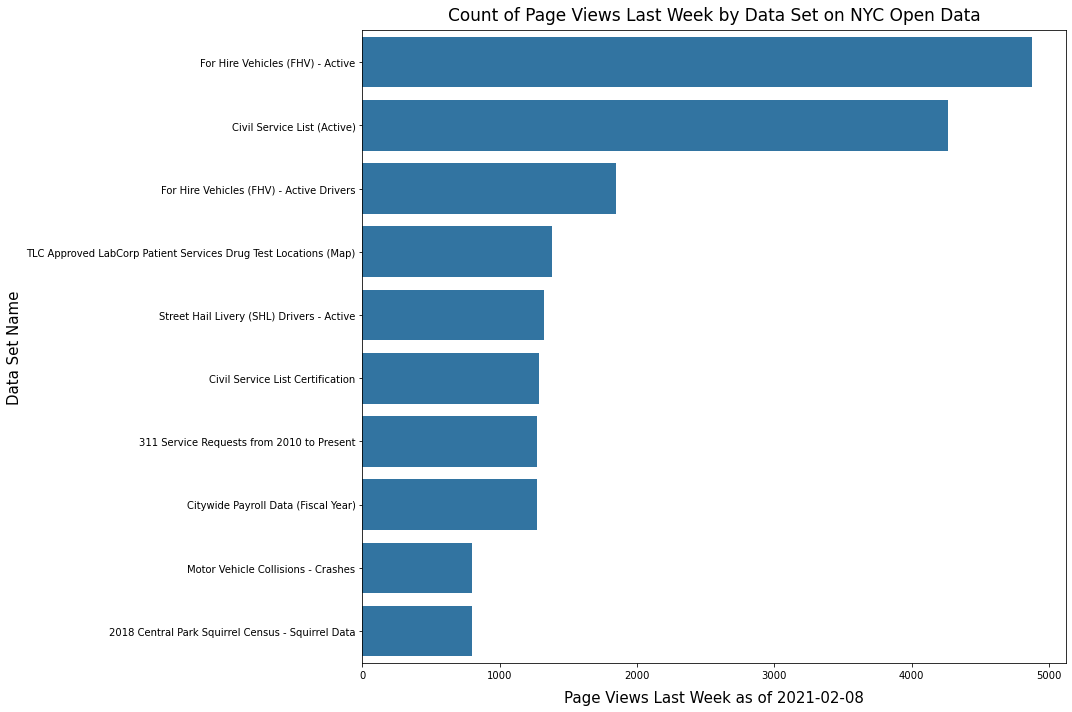

In [130]:
plt.figure(figsize=(15,10))

sns.barplot(data=df.sort_values(by='page_views_last_week', ascending=False).head(10),
            y='name',
            x='page_views_last_week',
            color='#1f77b4')

plt.title('Count of Page Views Last Week by Data Set on NYC Open Data', 
          fontsize=17,
          pad=10)
plt.xlabel('Page Views Last Week as of ' + str(today), fontsize=15, labelpad=10)
plt.ylabel('Data Set Name', fontsize=15)
plt.tight_layout()

plt.savefig('figures/page_views_last_week.png')

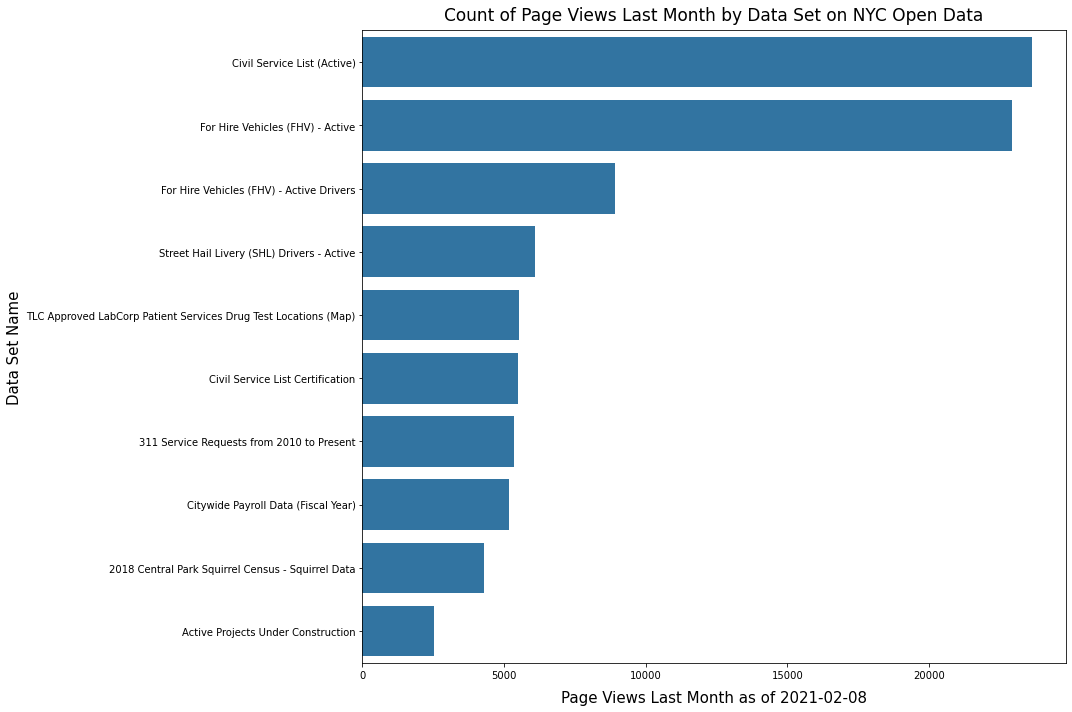

In [131]:
plt.figure(figsize=(15,10))

sns.barplot(data=df.sort_values(by='page_views_last_month', ascending=False).head(10),
            y='name',
            x='page_views_last_month',
            color='#1f77b4')

plt.title('Count of Page Views Last Month by Data Set on NYC Open Data', 
          fontsize=17,
          pad=10)
plt.xlabel('Page Views Last Month as of ' + str(today), fontsize=15, labelpad=10)
plt.ylabel('Data Set Name', fontsize=15)
plt.tight_layout()

plt.savefig('figures/page_views_last_month.png')

# 6. Retrieving Data Directly from Socrata Open Data API (SODA)

Not recommended, but this method still works and may be useful in certain occasions.

In [133]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Data set id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

url = 'https://' + socrata_domain + '/resource/' + socrata_dataset_identifier + '.csv?$limit=20'
print(url)

df = pd.read_csv(url)
print(df.shape)

df.head()

https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=20
(20, 41)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,49724744,2021-02-07T01:59:45.000,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467,3208 OLINVILLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871829,-73.868238,"\n, \n(40.87182919244112, -73.86823762446096)"
1,49726578,2021-02-07T01:59:23.000,NaN,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11214,2312 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.603747,-73.987691,"\n, \n(40.60374718005381, -73.98769091835977)"
2,49724909,2021-02-07T01:59:20.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,11691,29-32 BEACH CHANNEL DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599573,-73.764215,"\n, \n(40.599572668185026, -73.76421523730716)"
3,49727248,2021-02-07T01:59:14.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10459,830 EAST 163 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.822224,-73.901125,"\n, \n(40.822224027258486, -73.90112454024609)"
4,49729933,2021-02-07T01:58:39.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10461,1735 PARKVIEW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847255,-73.828180,"\n, \n(40.847255309595425, -73.82818046269905)"


In [134]:
year = '2020'
column = 'created_date'

url = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?' \
'$where=' + column + '%20>=%20%27' + year + '%27'  \
'&$limit=20'
print(url)

df = pd.read_csv(url)
print(df.shape)

df.head()

https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$where=created_date%20>=%20%272020%27&$limit=20
(20, 41)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,45285347,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.600129,-73.941843,"\n, \n(40.6001292057807, -73.94184291675883)"
1,45285651,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864866,-73.888783,"\n, \n(40.86486556770799, -73.88878325729915)"
2,45285821,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below),11203,5707 CHURCH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652536,-73.923540,"\n, \n(40.65253575905768, -73.92353994017134)"
3,45287907,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11214,1602 SHORE PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.595653,-74.000173,"\n, \n(40.59565343138651, -74.00017283917487)"
4,45288120,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812996,-73.907973,"\n, \n(40.81299645614164, -73.90797324533352)"


In [135]:
url = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$query=SELECT%20*%20LIMIT%2020'
print(url)

df = pd.read_csv(url)
print(df.shape)

df.head()

https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$query=SELECT%20*%20LIMIT%2020
(20, 41)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,49724744,2021-02-07T01:59:45.000,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467,3208 OLINVILLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871829,-73.868238,"\n, \n(40.87182919244112, -73.86823762446096)"
1,49726578,2021-02-07T01:59:23.000,NaN,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11214,2312 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.603747,-73.987691,"\n, \n(40.60374718005381, -73.98769091835977)"
2,49724909,2021-02-07T01:59:20.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,11691,29-32 BEACH CHANNEL DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599573,-73.764215,"\n, \n(40.599572668185026, -73.76421523730716)"
3,49727248,2021-02-07T01:59:14.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10459,830 EAST 163 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.822224,-73.901125,"\n, \n(40.822224027258486, -73.90112454024609)"
4,49729933,2021-02-07T01:58:39.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10461,1735 PARKVIEW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847255,-73.828180,"\n, \n(40.847255309595425, -73.82818046269905)"


In [136]:
query = """
        SELECT %20
            * %20
        WHERE %20
            created_date %20 >= %20%27 2020 %27%20 
        LIMIT %20
            20
        """

query = ''.join(query.split())
print('query:', query)

url = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$query=' + query
print('url:', url)

df = pd.read_csv(url)
print(df.shape)

df.head()

query: SELECT%20*%20WHERE%20created_date%20>=%20%272020%27%20LIMIT%2020
url: https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$query=SELECT%20*%20WHERE%20created_date%20>=%20%272020%27%20LIMIT%2020
(20, 41)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,45285347,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.600129,-73.941843,"\n, \n(40.6001292057807, -73.94184291675883)"
1,45285651,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864866,-73.888783,"\n, \n(40.86486556770799, -73.88878325729915)"
2,45285821,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below),11203,5707 CHURCH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652536,-73.923540,"\n, \n(40.65253575905768, -73.92353994017134)"
3,45287907,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11214,1602 SHORE PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.595653,-74.000173,"\n, \n(40.59565343138651, -74.00017283917487)"
4,45288120,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812996,-73.907973,"\n, \n(40.81299645614164, -73.90797324533352)"


# 7. Conclusion